# Numerics.

This notebook is a companion of the analytical assignement on the ENSO system and refers to some of the results obtained there. We simply recall that the ENSO system is given by

\begin{align}
    x' & = -x + \gamma (bx + y) - \varepsilon (bx + y)^3 \\
    y' & = -ry - \alpha b x
\end{align}

where $x,y$ are related to sea surface temperature and thermoclyne anomalies.

We first import the necessary tools to plot solutions of our equation:

In [5]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
import math

The numerical values of the constants yield geophysically reasonable answers:

In [6]:
g = 3/4 #gamma
b = 5/3
e = 0.1 #epsilon
r = 1/4
a = 1/8 #alpha

## 1. The linear system.

The following code segment sets up a meshgrid (i.e. small rectangular chunks that we can solve the equation in)
The bounds in np.arrange describe the size of the meshgrid, or the domain over which we're solving.

In [7]:
nx, ny = .1, .1
x = np.arange(-2, 2, nx)
y = np.arange(-2, 2, ny)
X, Y = np.meshgrid(x, y)

First of all, enter the linearized system below:

In [8]:
dx = 
dy = 

SyntaxError: invalid syntax (1241527322.py, line 1)

The block below is a representation of the slope field (but with `connected' trajectories) on the meshgrid for the linear system.
Use the information provided [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html) to run the command plt.streamplot.

In [9]:
plt.streamplot(X,Y,dx, dy, density=2, cmap= 'jet', arrowsize=1)

NameError: name 'dx' is not defined

## 2. Solution of the linear system.

The code block below overlays the analytical solution of the linear system on the slope field obtained above. Modify $c_1$ and $c_2$ so that the range of your solution in $x$ is approximately between -1 and 1. Because you are not required to start at a specific initial condition, you may set one of your constants to zero and only modify the other constant. Keep the parameters constant at this point onwards.

In [11]:
#Note: use np.cos(t) for cos(t), np.sin(t) for sin(t), and np.sqrt() to sqrt()
# use x**2 to enter x^2
g = 3/4 #gamma
b = 5/3
e = 0.1 #epsilon
r = 1/4
a = 1/8 #alpha

c_1 = 
c_2 = 

w = #you can define omega here in terms of the other parameters if you'd like, it may make it easier to enter your solution

t=np.linspace(0,50,100)

def x(t):
    return #add your function before this comment

def y(t):
    return #add your function before this comment

plt.streamplot(X,Y,dx, dy, density=2, cmap= 'jet', arrowsize=1)
plt.plot(x(t),y(t))


SyntaxError: invalid syntax (2843023265.py, line 9)

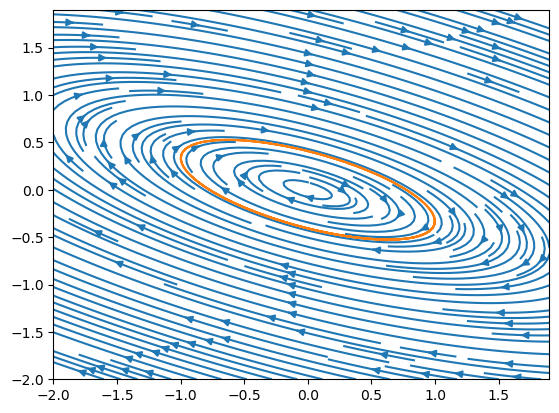

In [12]:
#note that there are many correct forms of the solution, this is simply one of them
g = 3/4 #gamma
b = 5/3
e = 0.1 #epsilon
r = 1/4
a = 1/8 #alpha


c_1 = 4/3
c_2 = 0

w = np.sqrt(-r**2 + a*r + a)

t=np.linspace(0,50,100)

def x(t):
    return g*(c_1*np.cos(w*t)+c_2*np.sin(w*t))

def y(t):
    return  -c_1*(r*np.cos(w*t)+w*np.sin(w*t))+ c_2*(w*np.cos(w*t)-r*np.sin(w*t))

plt.streamplot(X,Y,dx, dy, density=2, cmap= 'jet', arrowsize=1)
plt.plot(x(t),y(t))

## 3. Exploring the non-critical solution

We now explore the situation where the solutions of the linear system are not purely oscillatory. For this, slightly increase the value of $\gamma$ to $\gamma = \frac{35}{40}$ and plot again the slope field.

The second part of the block below returns a particular solution, so you should check that it fits with the slope field you obtained. How do successive El Nino events behave?

In [13]:
g =

plt.xlim(-2, 2)
plt.ylim(-2, 2)

# add code to insert the streamplot here

# the following code plots one particular solution with initial condition x=0.01,y=0
from scipy.integrate import solve_ivp
def thc(t,z,a,b,e,g,r):
    x,y=z
    return [-x + g*(b*x + y), -r*y - a*b*x]

t_eval = np.linspace(0,100,500)

sol_spiral = solve_ivp(thc, [0, 100], [0.01, 0], t_eval=t_eval, args=(a,b,e,g,r), max_step=0.01)

#plot numerical solution:

plt.plot(sol_spiral.y.T[:, 0], sol_spiral.y.T[:, 1])

SyntaxError: invalid syntax (2892202414.py, line 1)

## 3. Solution.

We simply set $\gamma = \frac{35}{40}$ and run the streamplot command. We observe that the stable periodic solution has indeed made place to outwards spirals, indicating stronger and stronger El Nino events. 

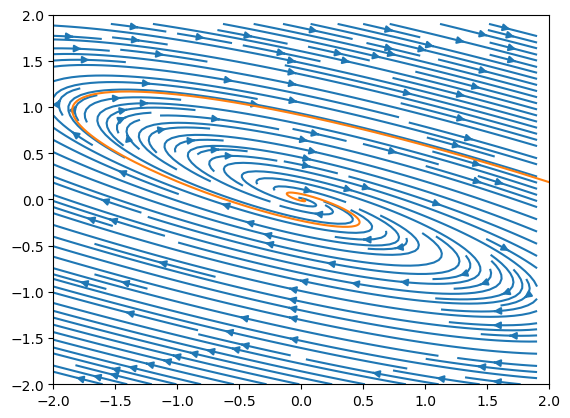

In [14]:
g = 3.5/4

plt.xlim(-2, 2)
plt.ylim(-2, 2)

dx = (g*b - 1) * X + g * Y
dy = -a*b*X - r*Y

plt.streamplot(X,Y,dx, dy, density=2, cmap= 'jet', arrowsize=1)

# the following code plots one particular solution with initial condition x=0.01,y=0
from scipy.integrate import solve_ivp
def thc(t,z,a,b,e,g,r):
    x,y=z
    return [-x + g*(b*x + y), -r*y - a*b*x]

t_eval = np.linspace(0,100,500)

sol_spiral = solve_ivp(thc, [0, 100], [0.01, 0], t_eval=t_eval, args=(a,b,e,g,r), max_step=0.01)

plt.plot(sol_spiral.y.T[:, 0], sol_spiral.y.T[:, 1])

## 4. The non-linear system

The code below plots the slope field for the full non-linear system and overlays the exponentially growing linearized solution in grey. It also plots two trajectories of the numerical solution to the non-linear equation so that you can the solutions of the non-linear system and its linearization.

What you see is the existence of a stable **limit cycle** in the non-linear system, this means that all trajectories approach the cycle that is approximated by your linearized solution.

This limit cycle of the non-linear system is in contrast to the exponential growth of the solution to the linear equation (in grey): This is an example of the **stabilization** effect of the non-linearity.

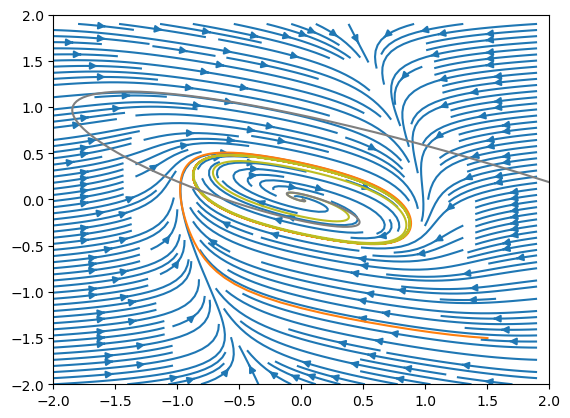

In [15]:
#First, find numerical solution to full non-linear system

from scipy.integrate import solve_ivp
def thc(t,z,a,b,e,g,r):
    x,y=z
    return [-x + g*(b*x + y) - e*(b*x + y)**3, -r*y - a*b*x]

t_eval = np.linspace(0,100,500)

# Here the [1.5, -1.5] and [0.01, 0] specify the initial conditions. Feel free to change them
solout = solve_ivp(thc, [0, 100], [1.5, -1.5], t_eval=t_eval, args=(a,b,e,g,r), max_step=0.01)
solin = solve_ivp(thc, [0, 100], [0.01, 0], t_eval=t_eval, args=(a,b,e,g,r), max_step=0.01)

plt.xlim(-2, 2)
plt.ylim(-2, 2)

#plot slopefield:
dx = -X + g*(b*X + Y) - e*(b*X + Y)**3
dy = -r*Y - a*b*X
plt.streamplot(X,Y,dx, dy, density=2, cmap= 'jet', arrowsize=1)

#plot numerical solutions:
plt.plot(solout.y.T[:, 0], solout.y.T[:, 1],'tab:orange')
plt.plot(solin.y.T[:, 0], solin.y.T[:, 1],'tab:olive')

plt.plot(sol_spiral.y.T[:, 0], sol_spiral.y.T[:, 1], 'tab:grey')